In [221]:
import pandas as pd

In [222]:
train= pd.read_csv("D:\Machine Learning Projects\datasets\\banking_train.csv",sep = ';')
test = pd.read_csv("D:\Machine Learning Projects\datasets\\banking_test.csv",sep = ';')

In [223]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [224]:
train.drop(['contact','poutcome'],axis='columns',inplace=True)
test.drop(['contact','poutcome'],axis='columns',inplace=True)

In [225]:
train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

In [226]:
test.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

(array([4000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         521.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

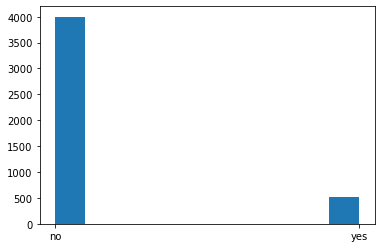

In [227]:
plt.hist(test['y'])

In [228]:
train = pd.get_dummies(train, drop_first=True)
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
test = pd.get_dummies(test, drop_first=True)
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [230]:
corr = train.corr()
corr['y_yes'].sort_values(ascending=False) 

y_yes                  1.000000
duration               0.394521
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
age                    0.025155
job_unemployed         0.020390
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default_yes           -0.022419
job_services          -0.027864
day                   -0.028348
month_jul             -0.034382
educatio

In [231]:
from sklearn.preprocessing import MinMaxScaler
columns = ['duration','balance','age']
scaler = MinMaxScaler()
train[columns] = scaler.fit_transform(train[columns])
test[columns] = scaler.fit_transform(test[columns])

In [232]:
train.balance[:5]

0    0.092259
1    0.073067
2    0.072822
3    0.086476
4    0.072812
Name: balance, dtype: float64

In [233]:
X_train = train.drop('y_yes',axis='columns')
y_train = train.y_yes

X_test = test.drop('y_yes',axis='columns')
y_test = test.y_yes

In [234]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm= smote.fit_resample(X_train,y_train)
X_test_sm,y_test_sm= smote.fit_resample(X_test,y_test)

(array([39922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39922.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

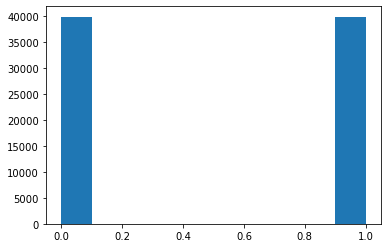

In [235]:
plt.hist(y_train_sm)

(array([4000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

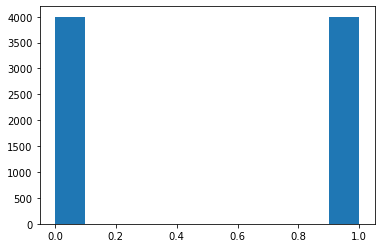

In [236]:
plt.hist(y_test_sm)

In [237]:
X_test_sm.shape

(8000, 37)

In [238]:
X_train_sm.shape

(79844, 37)

In [239]:
import tensorflow as tf
from tensorflow import keras

In [247]:
model = keras.Sequential([
    keras.layers.Dense(37, input_shape=(37,), activation='relu'),
    keras.layers.Dense(159, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             metrics=['accuracy'],
             loss='binary_crossentropy')

In [248]:
history = model.fit(X_train_sm,y_train_sm,epochs=20)

Epoch 1/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.4146 - accuracy: 0.8149
Epoch 2/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.3027 - accuracy: 0.8763
Epoch 3/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2814 - accuracy: 0.8845
Epoch 4/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2703 - accuracy: 0.8892
Epoch 5/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2600 - accuracy: 0.8921
Epoch 6/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.8935
Epoch 7/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2512 - accuracy: 0.8952
Epoch 8/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2455 - accuracy: 0.8978
Epoch 9/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.2430 - accuracy: 0.8982
Epoch 10/20
2496/2496 [==============================] - 3s 1ms/step - loss: 0.239

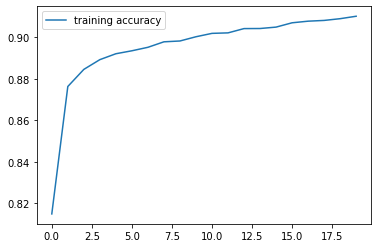

In [249]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.legend()
plt.show()

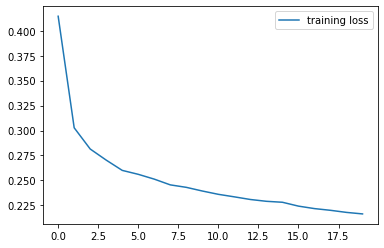

In [250]:
plt.figure(0)
plt.plot(history.history['loss'],label='training loss')
plt.legend()
plt.show()

In [254]:
predicted = model.predict(X_test_sm)
predicted[:5]

array([[0.6421001 ],
       [0.04449785],
       [0.4847712 ],
       [0.05204937],
       [0.00225705]], dtype=float32)

In [255]:
prediction =[]
for i in predicted:
    if i>0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [256]:
cm = tf.math.confusion_matrix(labels=y_test_sm, predictions=prediction)

<AxesSubplot:>

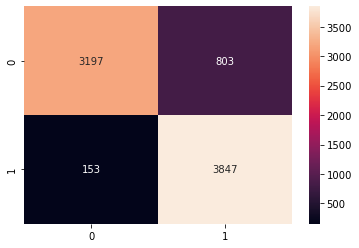

In [257]:
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')